In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

C:\tools\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#614 linhas e 13 colunas
df.shape

(614, 13)

In [5]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [6]:
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
plt.style.use("seaborn-notebook")

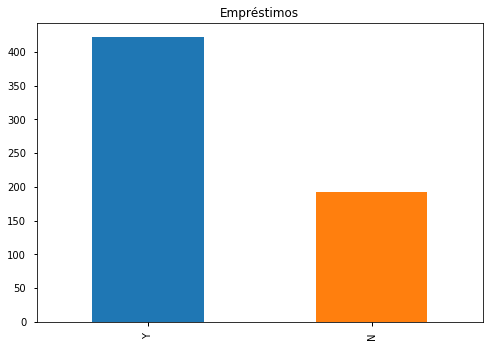

In [9]:
df['Loan_Status'].value_counts().plot(kind='Bar')
plt.title('Empréstimos')
plt.show()

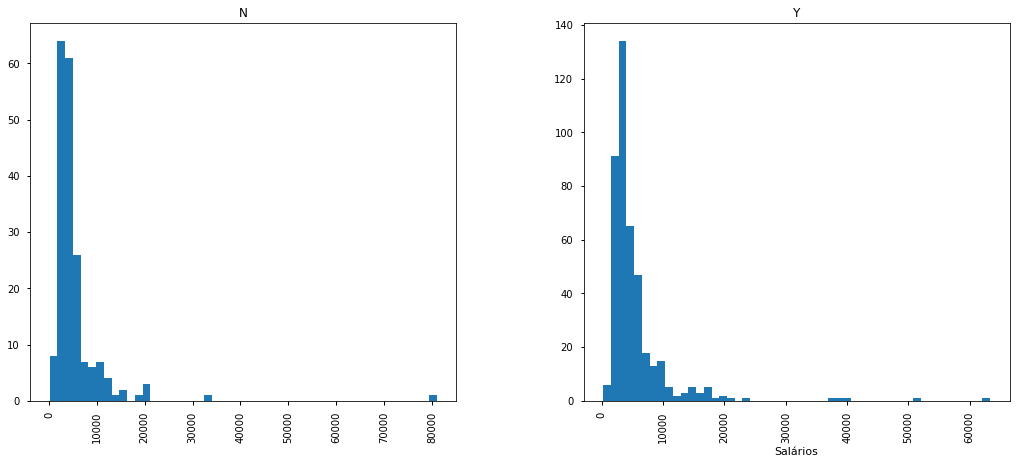

In [10]:
df[['Loan_Status', 'ApplicantIncome']].hist(by='Loan_Status', bins=50, figsize=(17,7))
plt.xlabel('Salários')
plt.show()

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.columns = ['Loan_ID', 'is_Male', 'is_Married', 'Dependents', 'is_Graduated', 'is_Self_Employed',
             'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 
              'Property_Area', 'Loan_Status']

In [13]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
yes_no_map = {'Yes': 1, 'No':0}
df['is_Married'] = df['is_Married'].map(yes_no_map)

In [15]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [17]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


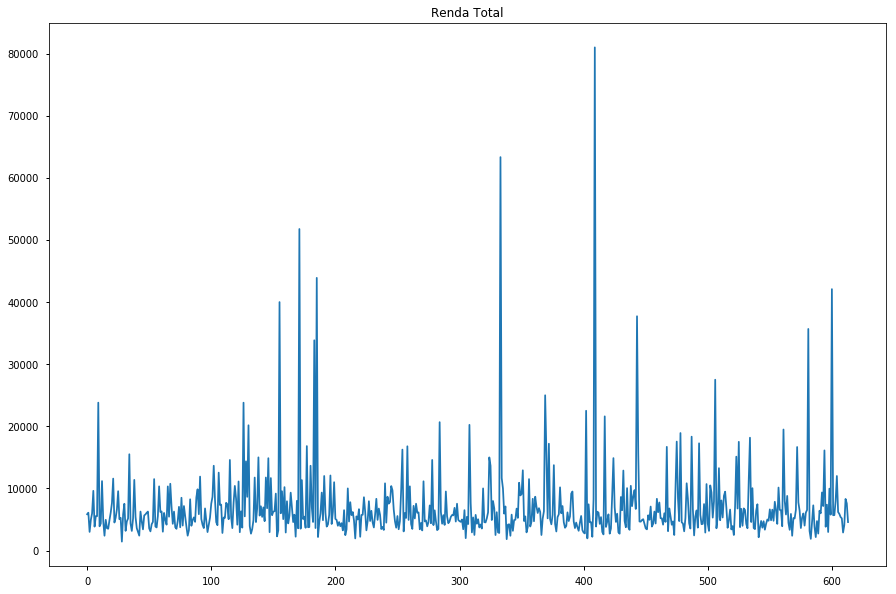

In [18]:
df['TotalIncome'].plot(figsize=(15,10))
plt.title('Renda Total')
plt.show()

In [19]:
mapper_status={'Y':1, 'N':0}
df['Loan_Status'] = df['Loan_Status'].map(mapper_status)

In [20]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [21]:
# gera tres colunas para Property_Area com tres colunas para ['Urban', 'Rural', 'Semiurban']
df = pd.get_dummies(df,columns=['Property_Area'])

In [22]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,5849.0,0,0,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,6091.0,1,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,3000.0,0,0,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,0,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,6000.0,0,0,1


In [23]:
df.shape

(614, 16)

In [24]:
df.drop('Loan_ID', axis=1, inplace=True)

In [25]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,5849.0,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,6091.0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,3000.0,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,6000.0,0,0,1


In [26]:
#mostra os nulos por coluna de forma decrescente
df.isnull().sum().sort_values(ascending=False)

Credit_History             50
LoanAmount                 22
is_Married                  3
Property_Area_Urban         0
Property_Area_Semiurban     0
Property_Area_Rural         0
TotalIncome                 0
Loan_Status                 0
Loan_Amount_Term            0
CoapplicantIncome           0
ApplicantIncome             0
is_Self_Employed            0
is_Graduated                0
Dependents                  0
is_Male                     0
dtype: int64

In [27]:
df = df.loc[df['is_Married'].notnull()]

In [28]:
df['LoanAmount'].mean()

146.36949152542374

In [29]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [30]:
df.isnull().sum().sort_values(ascending=False)

Credit_History             50
Property_Area_Urban         0
Property_Area_Semiurban     0
Property_Area_Rural         0
TotalIncome                 0
Loan_Status                 0
Loan_Amount_Term            0
LoanAmount                  0
CoapplicantIncome           0
ApplicantIncome             0
is_Self_Employed            0
is_Graduated                0
Dependents                  0
is_Married                  0
is_Male                     0
dtype: int64

In [31]:
df['Credit_History'].value_counts()

1.0    472
0.0     89
Name: Credit_History, dtype: int64

In [32]:
df['Credit_History'].fillna(1, inplace=True)

In [33]:
df.isnull().sum().sort_values(ascending=False)

Property_Area_Urban        0
Property_Area_Semiurban    0
Property_Area_Rural        0
TotalIncome                0
Loan_Status                0
Credit_History             0
Loan_Amount_Term           0
LoanAmount                 0
CoapplicantIncome          0
ApplicantIncome            0
is_Self_Employed           0
is_Graduated               0
Dependents                 0
is_Married                 0
is_Male                    0
dtype: int64

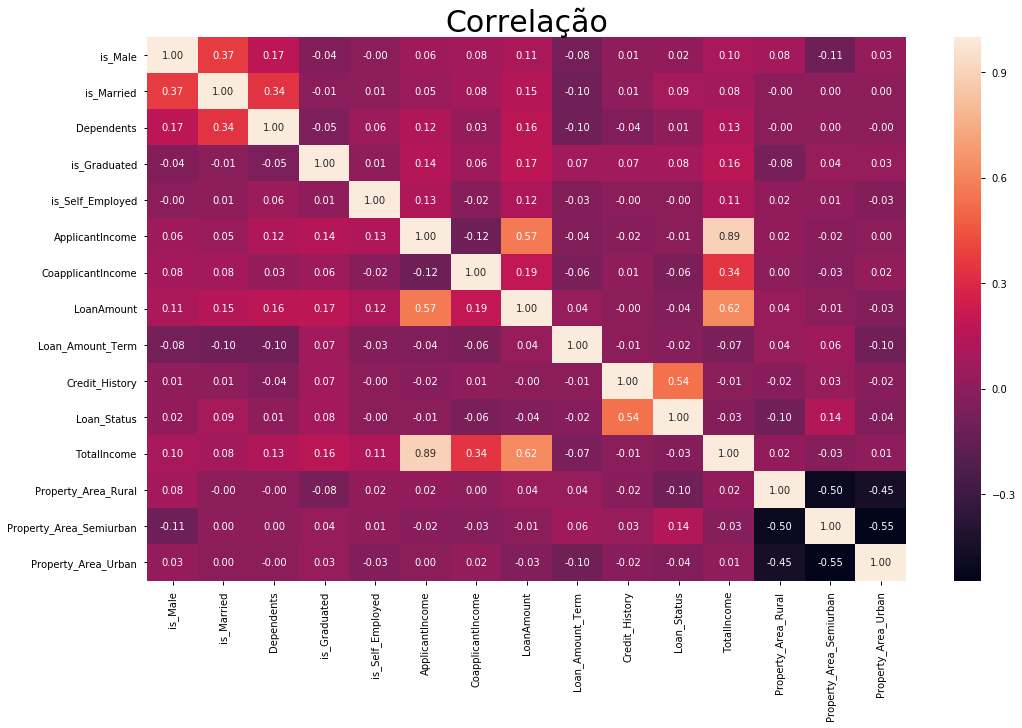

In [34]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.title('Correlação', fontsize=30)
plt.show()

In [35]:
#Normalizando em log natural
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])

In [36]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,8.674026,0.0,146.369492,360.0,1.0,1,8.674026,0,0,1
1,1.0,1.0,1.0,1,0.0,8.430109,1508.0,128.000000,360.0,1.0,0,8.714568,1,0,0
2,1.0,1.0,0.0,1,1.0,8.006368,0.0,66.000000,360.0,1.0,1,8.006368,0,0,1
3,1.0,1.0,0.0,0,0.0,7.856707,2358.0,120.000000,360.0,1.0,1,8.505323,0,0,1
4,1.0,0.0,0.0,1,0.0,8.699515,0.0,141.000000,360.0,1.0,1,8.699515,0,0,1


In [37]:
df.columns

Index(['is_Male', 'is_Married', 'Dependents', 'is_Graduated',
       'is_Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'TotalIncome', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [38]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
Ir = LogisticRegression()
Ir.fit(X_train, y_train)
print('Score do conjunto de treino: {0:.2%}'.format(Ir.score(X_train, y_train)))
print('Score do conjunto de teste: {0:.2%}'.format(Ir.score(X_test, y_test)))

Score do conjunto de treino: 80.44%
Score do conjunto de teste: 82.18%


In [41]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
print('Score do conjunto de treino: {0:.2%}'.format(dt.score(X_train, y_train)))
print('Score do conjunto de teste: {0:.2%}'.format(dt.score(X_test, y_test)))

Score do conjunto de treino: 82.64%
Score do conjunto de teste: 83.17%


In [42]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7)
rf.fit(X_train, y_train)
print('Score do conjunto de treino: {0:.2%}'.format(rf.score(X_train, y_train)))
print('Score do conjunto de teste: {0:.2%}'.format(rf.score(X_test, y_test)))

Score do conjunto de treino: 86.31%
Score do conjunto de teste: 82.67%


In [43]:
new_df = X_test
dt.predict(new_df)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1], dtype=int64)

In [44]:
new_df['Loan_Status'] = dt.predict(new_df)


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
new_df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
81,1.0,1.0,1.0,1,1.0,7.781139,0.0,146.369492,360.0,1.0,7.781139,0,1,0,1
219,0.0,1.0,2.0,1,0.0,8.362409,2383.0,127.000000,360.0,1.0,8.804775,0,1,0,1
55,1.0,1.0,2.0,1,0.0,7.903966,1167.0,97.000000,360.0,1.0,8.262301,0,1,0,1
602,1.0,1.0,3.0,1,0.0,8.648748,0.0,128.000000,360.0,1.0,8.648748,0,0,1,1
266,1.0,1.0,2.0,1,0.0,8.457018,1387.0,150.000000,360.0,1.0,8.715224,0,1,0,1


In [47]:
new_df.to_csv('dados_previstos.csv', index=False)

In [48]:
import pickle
pickle.dump(dt, open('modelo_treinado.sav', 'wb'))